![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

### Estudiante: Gabriel Ricardo Bolaños Garcia

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [113]:
# Importación de librerías
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score
from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [10]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

Se puede observar que es mas frecuente la renta de bicicletas en primavera, verano y otoño, representadas por los valores de 2, 3 y 4 respectivamente de la variables 'season'. Lo cual nos indica que la población prefiere mejores condiciones climáticas al usar bicicletas y evita en lo posible el uso de las mismas en epocas de invierno (season = 1).

In [7]:
bikes['season'].describe()

count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64

Complementando la observación anterior, se ve claramente como los cuartiles muestran una predominancia de los datos con valores de 2 en adelante.

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Respecto al comportamiento de renta de bicicletas y el horario, encontramos como la población renta bicicletas principalmente entre las 7AM y las 10PM, con ciertos valores atipicos en horas de madrugada o media noche. Sin embargo, es importante destacar que a pesar de presentar actividad principalmente en jornadas diurnas, existen picos de renta a las 8AM y a las 5PM - 6PM. Lo cual nos podría dar un indicio de que la población renta bicicletas para ir a sus trabajos, universidades, etc y finalizando la tarde rentan bicicletas para regresar a sus hogares.

In [11]:
bikes['hour'].describe()

count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

Complementando la observación anterior sobre la variable _**'hour'**_, encontramos como los cuartiles nos presentan un rango "inicial" de la jornada de la población y un rango "final" de la población. 

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:title={'center':'Número de Bicicletas Rentadas'}, xlabel='hour'>

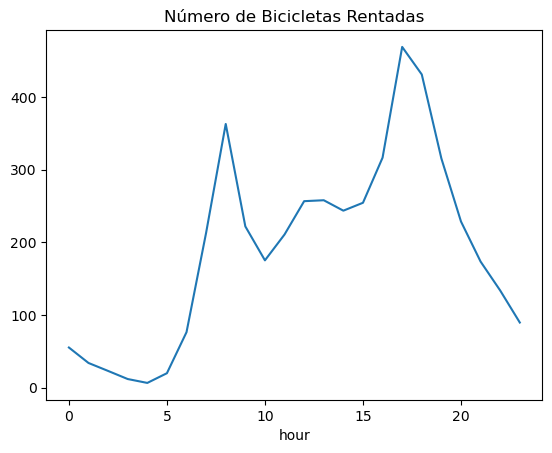

In [23]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot(title='Número de Bicicletas Rentadas')

<AxesSubplot:title={'center':'Número de Bicicletas Rentadas en Invierno'}, xlabel='hour'>

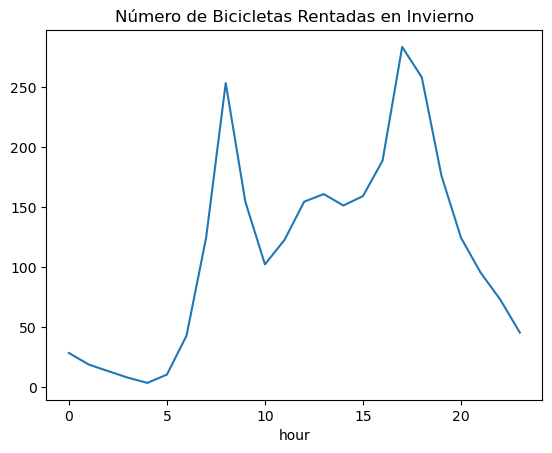

In [21]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot(title='Número de Bicicletas Rentadas en Invierno')

Se puede observar un comportamiento muy similar de la población sobre la renta de bicicletas inicial, principalmente se da la renta de bicicletas en unas jornadas diurnas. Sin embargo, dadas las condiciones climaticas se observa una reducción en la cantidad total de rentas diarias, demostrando que las personas en invierno rentan menos bicicletas.

<AxesSubplot:title={'center':'Número de Bicicletas Rentadas en Verano'}, xlabel='hour'>

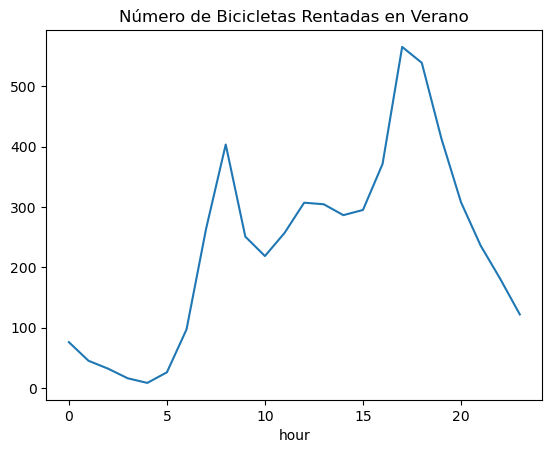

In [22]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot(title='Número de Bicicletas Rentadas en Verano')

Se puede observar un comportamiento muy similar de la población sobre la renta de bicicletas inicial, principalmente se da la renta de bicicletas en unas jornadas diurnas. Dadas las condiciones climaticas se observan los mismos picos máximos que la gráfica inicial en la cantidad total de rentas diarias, demostrando que las personas en Verano rentan más bicicletas.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [157]:
# Celda 3
X = bikes[['season', 'hour']]
y = bikes[['total']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
# Modelo de Regresion Lineal con las Variables sin Dumificar
rl = LinearRegression()
rl.fit(X_train, y_train)

LinearRegression()

In [73]:
print(f"El intercepto es: {rl.intercept_}.\nLos coeficientes del modelo para 'season' y 'hour' son los siguientes: {rl.coef_}")

El intercepto es: [0.05192388].
Los coeficientes del modelo para 'season' y 'hour' son los siguientes: [[27.78693846 10.50946182]]


El modelo entrenado nos muestra una ecuación de recta con una pendiente creciente. Es decir, entre mayor es la hora y mas grande es el valor de la variable 'season' mayor será la cantidad de bicicletas rentadas. Además nos muestra una importancia alta en la variable 'season' y esto puede obedecer a que al ser una variable categórica debe recibir un tratamiento de codificación para evitar un mal ajuste causado por el comportamiento ordinal. 

Si se quiere tener un modelo más preciso, deberiamos codificar de forma distinta la variable 'season' como por ejemplo con un un _'one_hot_encoding'_.

La principal limitación del modelo podria decirse que el contexto del problema no tiene una relación lineal incremental entre ambas variables. Por ejemplo, estaria mal decir que en la hora 23 ( 11PM en formato de 24H) las personas rentaran más bicicletas. La interpretabilidad del modelo no es tan acertada.

In [100]:
y_pred = rl.predict(X_test)
r2_Lr = r2_score(y_test, y_pred)
print("R2 score:", r2_Lr)

R2 score: 0.17669504581342466


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [56]:
# Celda 4

# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

In [57]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [58]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [182]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    features = range(X.shape[1])
    #print(f"Features All: {features}")
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        #print(f"Feature {j}")
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        #print(f"splits 1 {splits}")
        splits = np.unique(splits)[1:]
        #print(f"splits 2 {splits}")
        
        # Para cada partición
        for split in splits:
            #print(f"split solo {split}")
            gain = gini_impurity(X.iloc[:, j], y, split)
            #print(f"gini_impurity {gain} and type: {type(gain)}")
            #print(f"gini_impurity {gain.item()} and type: {type(gain.item())}")
            #print(f"best_split[2]: {best_split[2]} and type {type(best_split[2])}")            
            if gain.item() > best_split[2]:
                best_split = [j, split, gain.item()]
    
    return best_split

In [183]:
best_split(X_train, y_train, num_pct=6)

[1, 6.0, 17961.866009057354]

In [184]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [186]:
tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=2, num_pct=6)

{'y_pred': 1,
 'y_prob': total    190.811825
 dtype: float64,
 'level': 0,
 'split': [1, 6.0],
 'n_samples': 8708,
 'gain': 17961.866009057354,
 'sl': {'y_pred': 1,
  'y_prob': total    25.423398
  dtype: float64,
  'level': 1,
  'split': [1, 2.0],
  'n_samples': 2152,
  'gain': 396.10111004989835,
  'sl': {'y_pred': 1,
   'y_prob': total    44.687668
   dtype: float64,
   'level': 2,
   'split': -1,
   'n_samples': 744,
   'gain': 300.4714846076149},
  'sr': {'y_pred': 1,
   'y_prob': total    15.195745
   dtype: float64,
   'level': 2,
   'split': -1,
   'n_samples': 1408,
   'gain': 41.316559779953934}},
 'sr': {'y_pred': 1,
  'y_prob': total    245.076243
  dtype: float64,
  'level': 1,
  'split': [0, 2.0],
  'n_samples': 6556,
  'gain': 6369.853991641081,
  'sl': {'y_pred': 1,
   'y_prob': total    148.013245
   dtype: float64,
   'level': 2,
   'split': -1,
   'n_samples': 1659,
   'gain': 2510.957333652914},
  'sr': {'y_pred': 1,
   'y_prob': total    277.885487
   dtype: float6

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [97]:
# Celda 5
# Parametro de Calibracion
depth = 20

# Creacion de Modelo de Arbol Regresor
RegTree = DecisionTreeRegressor(max_depth=depth, random_state=1)

In [102]:
# Entrenamiento de Modelo
RegTree.fit(X_train, y_train)

# Predicciones con los datos de prueba
predictions = RegTree.predict(X_test)

# Evaluacion de modelo
r2_regTree = r2_score(y_test, predictions)
print(f"Coeficiente de determinación (R2): {r2}")

Coeficiente de determinación (R2): 0.5980631958469343


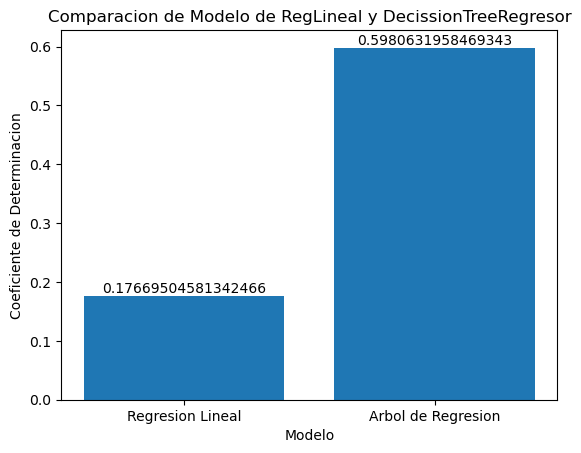

In [104]:
# Comparando Modelos
etiquetas = ['Regresion Lineal', 'Arbol de Regresion']
valores = [r2_Lr, r2_regTree]
plt.bar(etiquetas, valores)
for i in range(len(valores)):
    plt.text(i, valores[i], valores[i], ha='center', va='bottom')
plt.title('Comparacion de Modelo de RegLineal y DecissionTreeRegresor')
plt.xlabel('Modelo')
plt.ylabel('Coeficiente de Determinacion')
plt.show()

Podemos observar claramente como el poder predictivo de un árbol de decisión para un mismo contexto de problema de analitics demuestra una gran ventaja sobre modelos clasicos de regresion como lo es una regresión lineal.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [105]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [106]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [107]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [111]:
# Celda 6

# Calibrar el parámetro de profundidad máxima del árbol
for max_depth in range(1, 6):
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Árbol con profundidad máxima de {max_depth}: Accuracy = {acc:.3f}, F1-Score = {f1:.3f}")

Árbol con profundidad máxima de 1: Accuracy = 0.645, F1-Score = 0.645
Árbol con profundidad máxima de 2: Accuracy = 0.645, F1-Score = 0.645
Árbol con profundidad máxima de 3: Accuracy = 0.641, F1-Score = 0.638
Árbol con profundidad máxima de 4: Accuracy = 0.651, F1-Score = 0.650
Árbol con profundidad máxima de 5: Accuracy = 0.637, F1-Score = 0.636


In [112]:
# Construimos el modelo árbol de decisión con el Mejor Accuracy y F1-score provisto por la calibración anterior.
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

# Evaluamos desempeño de modelo 'tree'
y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred, average='weighted')
print(f"Árbol de Decision: Accuracy = {acc_tree:.3f}, F1-Score = {f1_tree:.3f}")

# Construir la regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Evaluar el desempeño de la regresión logística
y_pred_Rl = logreg.predict(X_test)
acc_Rl = accuracy_score(y_test, y_pred_Rl)
f1_Rl = f1_score(y_test, y_pred, average='weighted')
print(f"Regresión Logística: Accuracy = {acc_Rl:.3f}, F1-Score = {f1_Rl:.3f}")

Árbol de Decision: Accuracy = 0.651, F1-Score = 0.636
Regresión Logística: Accuracy = 0.613, F1-Score = 0.636


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [151]:
# Celda 7
# Crear modelos
modelos = []
modelos.append(('Arbol_MaxDepth', DecisionTreeClassifier(max_depth=5)))
modelos.append(('Arbol_minSampleLeaf', DecisionTreeClassifier(min_samples_leaf=10)))
modelos.append(('RegresionLogistica', LogisticRegression()))

# Evaluar modelos independientes
resultados = []
nombres = []
for nombre, modelo in modelos:
    # Tamaño de muestra Bootstrap
    n_bootstrap = 100
    bootstraps = [resample(X_train, y_train) for i in range(n_bootstrap)]

    # Entrenar y evaluar modelo
    acc_scores = []
    f1_scores = []
    for boot in bootstraps:
        modelo.fit(boot[0], boot[1])
        y_pred = modelo.predict(X_test)
        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    acc_mean = np.mean(acc_scores)
    f1_mean = np.mean(f1_scores)
    resultados.append((acc_mean, f1_mean))
    nombres.append(nombre)
    print(f"{nombre}: Accuracy = {acc_mean:.2f}, F1-Score = {f1_mean:.2f}")

# Ensamble de modelos Votacion mayoritaria = 'hard'
ensamble = VotingClassifier(estimators=modelos, voting='hard')
resultados_ensamble = []
nombres_ensamble = []

# Entrenamiento de Modelo Ensamble
ensamble.fit(X_train, y_train)

# Prediccion Modelo Ensamble
y_pred = ensamble.predict(X_test)

# Metricas
acc_scores = []
f1_scores = []
acc_scores.append(accuracy_score(y_test, y_pred))
f1_scores.append(f1_score(y_test, y_pred))
acc_mean = np.mean(acc_scores)
f1_mean = np.mean(f1_scores)
resultados_ensamble.append((acc_mean, f1_mean))
nombres_ensamble.append('Ensamble')
print(f"Ensamble: Accuracy = {acc_mean:.2f}, F1-Score = {f1_mean:.2f}")

Arbol_MaxDepth: Accuracy = 0.62, F1-Score = 0.62
Arbol_minSampleLeaf: Accuracy = 0.57, F1-Score = 0.57
RegresionLogistica: Accuracy = 0.61, F1-Score = 0.61
Ensamble: Accuracy = 0.63, F1-Score = 0.64


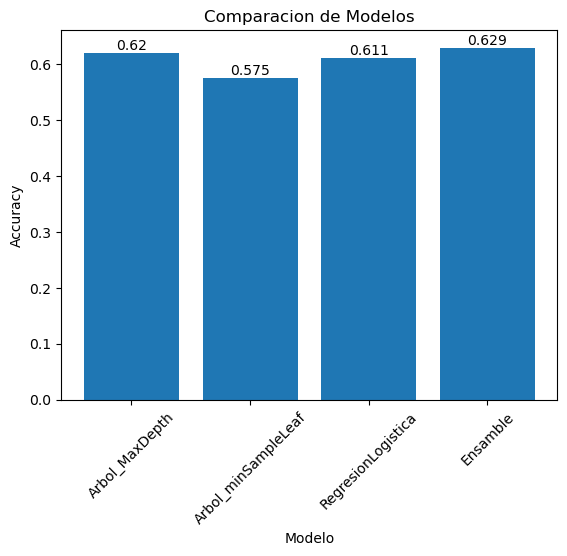

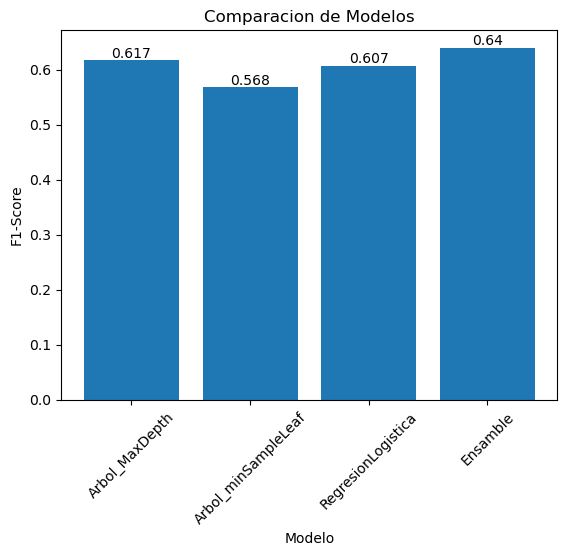

In [152]:
# Comparando Modelos
etiquetas = ['Arbol_MaxDepth', 'Arbol_minSampleLeaf', 'RegresionLogistica', 'Ensamble']
valores_acc = [round(resultados[0][0], 3), round(resultados[1][0], 3), round(resultados[2][0], 3), 
           round(resultados_ensamble[0][0],3)]
plt.bar(etiquetas, valores_acc)
for i in range(len(valores_acc)):
    plt.text(i, valores_acc[i], valores_acc[i], ha='center', va='bottom')
plt.title('Comparacion de Modelos')
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

valores_f1 = [round(resultados[0][1], 3), round(resultados[1][1], 3), 
               round(resultados[2][1], 3), round(resultados_ensamble[0][1], 3)]
plt.bar(etiquetas, valores_f1)
for i in range(len(valores_f1)):
    plt.text(i, valores_f1[i], valores_f1[i], ha='center', va='bottom')
plt.title('Comparacion de Modelos')
plt.xlabel('Modelo')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.show()

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [153]:
# Celda 8
# Crear modelos
modelos = []
modelos.append(('Arbol_MaxDepth', DecisionTreeClassifier(max_depth=5)))
modelos.append(('Arbol_minSampleLeaf', DecisionTreeClassifier(min_samples_leaf=10)))
modelos.append(('RegresionLogistica', LogisticRegression()))

# Evaluar modelos independientes
resultados = []
nombres = []
for nombre, modelo in modelos:
    # Tamaño de muestra Bootstrap
    n_bootstrap = 100
    bootstraps = [resample(X_train, y_train) for i in range(n_bootstrap)]

    # Entrenar y evaluar modelo
    acc_scores = []
    f1_scores = []
    for boot in bootstraps:
        modelo.fit(boot[0], boot[1])
        y_pred = modelo.predict(X_test)
        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    acc_mean = np.mean(acc_scores)
    f1_mean = np.mean(f1_scores)
    resultados.append((acc_mean, f1_mean))
    nombres.append(nombre)
    print(f"{nombre}: Accuracy = {acc_mean:.2f}, F1-Score = {f1_mean:.2f}")

# Ensamble de modelos con la metodologia de votacion ponderada = 'soft'
ensamble_2 = VotingClassifier(estimators=modelos, voting='soft')
resultados_ensamble_2 = []
nombres_ensamble_2 = []

# Entrenamiento de Modelo Ensamble
ensamble_2.fit(X_train, y_train)

# Prediccion Modelo Ensamble
y_pred = ensamble_2.predict(X_test)

# Metricas
acc_scores = []
f1_scores = []
acc_scores.append(accuracy_score(y_test, y_pred))
f1_scores.append(f1_score(y_test, y_pred))
acc_mean = np.mean(acc_scores)
f1_mean = np.mean(f1_scores)
resultados_ensamble_2.append((acc_mean, f1_mean))
nombres_ensamble_2.append('Ensamble 2')
print(f"Ensamble 2: Accuracy = {acc_mean:.2f}, F1-Score = {f1_mean:.2f}")

Arbol_MaxDepth: Accuracy = 0.62, F1-Score = 0.62
Arbol_minSampleLeaf: Accuracy = 0.58, F1-Score = 0.57
RegresionLogistica: Accuracy = 0.61, F1-Score = 0.61
Ensamble 2: Accuracy = 0.61, F1-Score = 0.62


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

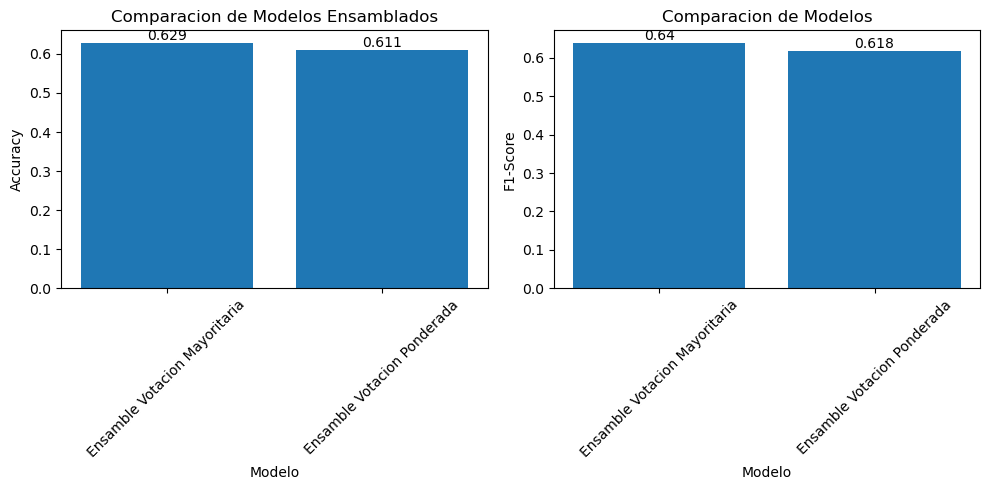

In [154]:
# Celda 9
# Comparando Modelos

etiquetas = ['Ensamble Votacion Mayoritaria', 'Ensamble Votacion Ponderada']
valores_acc = [round(resultados_ensamble[0][0],3), round(resultados_ensamble_2[0][0],3)]
valores_f1 = [round(resultados_ensamble[0][1], 3), round(resultados_ensamble_2[0][1], 3)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax1.bar(etiquetas, valores_acc)
for i in range(len(valores_acc)):
    ax1.text(i, valores_acc[i], valores_acc[i], ha='center', va='bottom')
ax1.set_title('Comparacion de Modelos Ensamblados')
ax1.set_xlabel('Modelo')
ax1.set_ylabel('Accuracy')
ax1.set_xticklabels(etiquetas, rotation=45)

ax2.bar(etiquetas, valores_f1)
for i in range(len(valores_f1)):
    ax2.text(i, valores_f1[i], valores_f1[i], ha='center', va='bottom')
ax2.set_title('Comparacion de Modelos')
ax2.set_xlabel('Modelo')
ax2.set_ylabel('F1-Score')
ax2.set_xticklabels(etiquetas, rotation=45)

plt.tight_layout()
plt.show()

### Conclusiones

- Los resultados nos muestran una clara mejoría de los modelos ensamblados versus los modelos independientes. Por ejemplo para el ensamble con metodologia por votacion mayoritaria encontramos que tanto el accuracy como el f1-score superaron el desempeño de los clasificadores _"Arbol_MaxDepth"_, _"Arbol_minSampleLeaf"_, _"RegresionLogistica"_ : 

    - Arbol_MaxDepth: Accuracy = 0.62, F1-Score = 0.62
    - Arbol_minSampleLeaf: Accuracy = 0.57, F1-Score = 0.57
    - RegresionLogistica: Accuracy = 0.61, F1-Score = 0.61
    - Ensamble: Accuracy = 0.63, F1-Score = 0.64 
 
 
- El ensamble con metodologia por votacion ponderada entregó unos resultados muy similares a los modelos independientes:

    - Arbol_MaxDepth: Accuracy = 0.62, F1-Score = 0.62
    - Arbol_minSampleLeaf: Accuracy = 0.58, F1-Score = 0.57
    - RegresionLogistica: Accuracy = 0.61, F1-Score = 0.61
    - Ensamble 2: Accuracy = 0.61, F1-Score = 0.62

    Demostrando una posible falta de calibración sobre los modelos ensamblados. 
    
- El ensamble con metodologia por votacion mayoritaria presenta un desempeño mayor sobre el ensamble con metodologia por votacion ponderada, demostrando que la calibración de los pesos que impactan el desempeño del segundo deben ser calculados meticulosamente para igualar o mejorar al primero.
